<a href="https://colab.research.google.com/github/2303a52163/SML_2303a52163/blob/main/SML9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



                 **SML ASSIGNMENT-9**


   
   **Course Name:        Statistical Machine Learning**  

   **Resources:          Google Colab**

   **Name:               U.Maheesh Varma**

   **RollNo:             2303A52163**

   **Batch:              34**















   

#**Question 1:**

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks

**1.Read the data with pandas and find features and target variables**

**2.Find target variable**

**3.Select suitable model and train**

**4.Find accuracy with different test sizes**


In [ ]:
import pandas as pd
data = pd.read_csv('/content/breast_cancer_survival.csv')
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [ ]:
data.replace('FEMALE',0, inplace=True)
data.replace('MALE',1, inplace=True)
data.replace('Positive',1, inplace=True)
data.replace('Negative',0, inplace=True)
data.replace('Dead',0, inplace=True)
data.replace('Alive',1, inplace=True)

In [ ]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,1,1,0,Other,20-May-18,26-Aug-18,1.0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,1,1,0,Other,26-Apr-18,25-Jan-19,0.0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,1,1,0,Lumpectomy,24-Aug-18,08-Apr-20,1.0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,1,1,0,Other,16-Nov-18,28-Jul-20,1.0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,1,1,Lumpectomy,12-Dec-18,05-Jan-19,1.0


In [ ]:
data['Surgery_type'].unique()

array(['Other', 'Lumpectomy', 'Modified Radical Mastectomy',
       'Simple Mastectomy'], dtype=object)

In [ ]:
data['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

In [ ]:
data.replace('II',2, inplace=True)
data.replace('III',3, inplace=True)
data.replace('I',1, inplace=True)

In [ ]:
data.replace('Infiltrating Ductal Carcinoma',1, inplace=True)
data.replace('Infiltrating Lobular Carcinoma',2, inplace=True)
data.replace('Mucinous Carcinoma',3, inplace=True)

In [ ]:
data.replace('Other',0, inplace=True)
data.replace('Lumpectomy',1, inplace=True)
data.replace('Modified Radical Mastectomy',2, inplace=True)
data.replace('Simple Mastectomy',3, inplace=True)

In [ ]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0,20-May-18,26-Aug-18,1.0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0,26-Apr-18,25-Jan-19,0.0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1,24-Aug-18,08-Apr-20,1.0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0,16-Nov-18,28-Jul-20,1.0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1,12-Dec-18,05-Jan-19,1.0


In [ ]:
x=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
y=data['Patient_Status']

In [ ]:
x.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1


In [ ]:
y.count()

321

In [ ]:
y.head()

,Patient_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [ ]:
y.isnull().sum()
y.fillna(0,inplace=True)


from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)


y.isnull().sum()

0

from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.45098039215686275


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[11 41]
 [15 35]]


<Axes: >

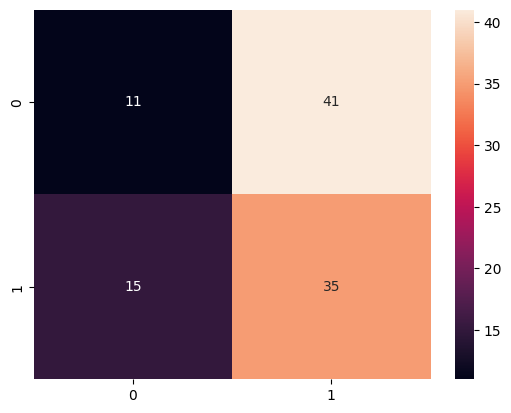

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.21      0.28        52
         1.0       0.46      0.70      0.56        50

    accuracy                           0.45       102
   macro avg       0.44      0.46      0.42       102
weighted avg       0.44      0.45      0.42       102



#**Question 2:**

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks

**1.Implement Logistic Regression using pre-defied library. Analysis of different training and testing splits ranges, and find the accuracy.**

In [ ]:
from sklearn.linear_model import LogisticRegression,Perceptron
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
yp = model.predict(x_test)
print(accuracy_score(y_test,yp))

0.696078431372549


In [ ]:
print(confusion_matrix(y_test,yp))

[[36 16]
 [15 35]]


<Axes: >

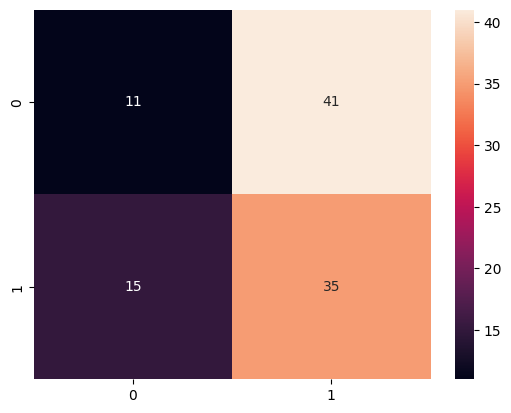

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        52
         1.0       0.69      0.70      0.69        50

    accuracy                           0.70       102
   macro avg       0.70      0.70      0.70       102
weighted avg       0.70      0.70      0.70       102



In [ ]:
pm= Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp = pm.predict(x_test)
print(accuracy_score(y_test,yp))

0.49019607843137253


In [ ]:
print(confusion_matrix(y_test,yp))

[[ 0 52]
 [ 0 50]]


<Axes: >

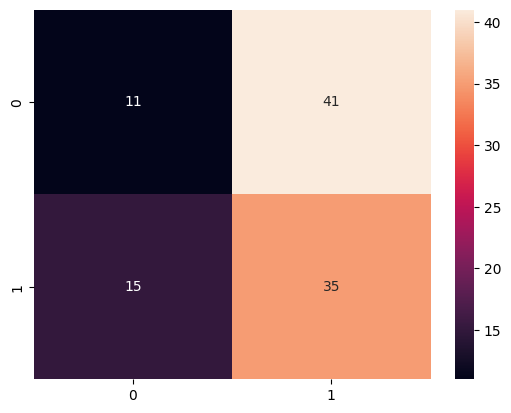

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        52
         1.0       0.69      0.70      0.69        50

    accuracy                           0.70       102
   macro avg       0.70      0.70      0.70       102
weighted avg       0.70      0.70      0.70       102

